# Práctica 4: transformación de datos numéricos


## Dataframe 1: Titanic

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [9]:
train = pd.read_csv('C:/Users/HP/Downloads/train1.csv')
train.shape

(891, 12)

In [10]:
test = pd.read_csv('C:/Users/HP/Downloads/test1.csv')
test.shape

(418, 11)

### Transformación de variables numéricas


In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
test['Fare'] = test['Fare'].astype(float)
test_data = test[['Fare']]

In [34]:
train['Fare'] = train['Fare'].astype(float)
train_data = train[['Fare']]

#### Estandarización


In [19]:
scaler = StandardScaler()
scaler.fit(train_data)

print("train:\n", train_data.head(10))
print("\ntest:\n", test_data.head(10))

print("Transformación train:\n", pd.DataFrame(scaler.transform(train_data)).head(10))
print("\nTransformación test:\n", pd.DataFrame(scaler.transform(test_data)).head(10))

print("\nMedia:", scaler.mean_)
print("\nDesviación Estándar:", scaler.var_)

train:
       Fare
0   7.2500
1  71.2833
2   7.9250
3  53.1000
4   8.0500
5   8.4583
6  51.8625
7  21.0750
8  11.1333
9  30.0708

test:
       Fare
0   7.8292
1   7.0000
2   9.6875
3   8.6625
4  12.2875
5   9.2250
6   7.6292
7  29.0000
8   7.2292
9  24.1500
Transformación train:
           0
0 -0.502445
1  0.786845
2 -0.488854
3  0.420730
4 -0.486337
5 -0.478116
6  0.395814
7 -0.224083
8 -0.424256
9 -0.042956

Transformación test:
           0
0 -0.490783
1 -0.507479
2 -0.453367
3 -0.474005
4 -0.401017
5 -0.462679
6 -0.494810
7 -0.064516
8 -0.502864
9 -0.162169

Media: [32.20420797]

Desviación Estándar: [2466.66531169]


####  Escala min-max 

In [35]:
from sklearn.preprocessing import MinMaxScaler

print("train:\n", train_data.head(10))
print("test:\n", test_data.head(10))

scaler = MinMaxScaler()
scaler.fit(train_data)
print("\nTransformación train:\n", pd.DataFrame(scaler.transform(train_data)).head(10))
print("\nTransformación test:\n", pd.DataFrame(scaler.transform(test_data)).head(10))

train:
       Fare
0   7.8292
1   7.0000
2   9.6875
3   8.6625
4  12.2875
5   9.2250
6   7.6292
7  29.0000
8   7.2292
9  24.1500
test:
       Fare
0   7.8292
1   7.0000
2   9.6875
3   8.6625
4  12.2875
5   9.2250
6   7.6292
7  29.0000
8   7.2292
9  24.1500

Transformación train:
           0
0  0.015282
1  0.013663
2  0.018909
3  0.016908
4  0.023984
5  0.018006
6  0.014891
7  0.056604
8  0.014110
9  0.047138

Transformación test:
           0
0  0.015282
1  0.013663
2  0.018909
3  0.016908
4  0.023984
5  0.018006
6  0.014891
7  0.056604
8  0.014110
9  0.047138


La variable Fare parece tener un outlier en 500

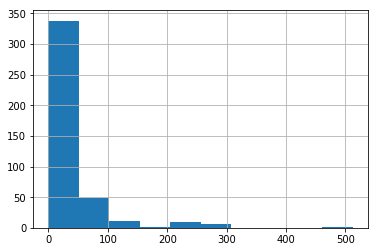

In [37]:
import matplotlib.pylab as plt
%matplotlib inline

train.Fare.hist()
plt.show()

In [39]:
train_data = train[['Fare']] # Data including outlier.
scaler = MinMaxScaler()
scaler.fit(train_data)
print("\nTransformación train:\n", pd.DataFrame(scaler.transform(train_data)).head())


Transformación train:
           0
0  0.015282
1  0.013663
2  0.018909
3  0.016908
4  0.023984


#### Transformación logarítmica


Antes de la transformación logarítmica el histograma de Fare se ve así

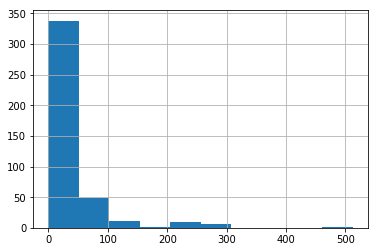

In [42]:
train.Fare.hist()
plt.show()

In [40]:
print("Train:\n", train_data.head(10))
print("\nTransformación train:\n", pd.DataFrame(np.log1p(train_data)).head(10))

Train:
       Fare
0   7.8292
1   7.0000
2   9.6875
3   8.6625
4  12.2875
5   9.2250
6   7.6292
7  29.0000
8   7.2292
9  24.1500

Transformación train:
        Fare
0  2.178064
1  2.079442
2  2.369075
3  2.268252
4  2.586824
5  2.324836
6  2.155152
7  3.401197
8  2.107689
9  3.224858


Después de la transformación:

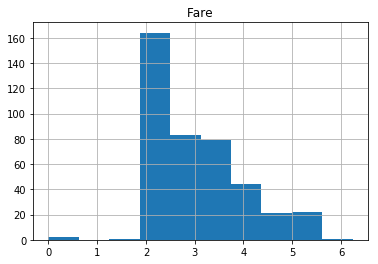

In [41]:
pd.DataFrame(np.log1p(train_data)).hist()
plt.show()

#### Transformación de Box-Cox

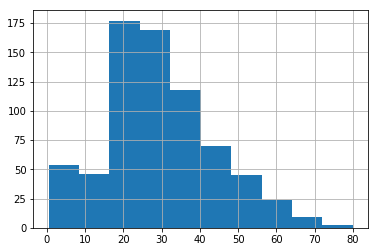

In [47]:
train.Age.hist()
plt.show()

In [45]:
from sklearn.preprocessing import PowerTransformer

train_data = train[['Age']]

pt = PowerTransformer(method='box-cox')
pt.fit(train_data)
train_data_trans = pt.transform(train_data)
print("Train:\n", train_data.head(10))
print("\nTransformación train:\n", pd.DataFrame(train_data_trans).head(10))

print("\nLambda:", pt.lambdas_) # Automatically selected 
print("\nMedia:", np.mean(train_data_trans)) 
print("\nDesviación Estándar:", np.std(train_data_trans))

Train:
     Age
0  22.0
1  38.0
2  26.0
3  35.0
4  35.0
5   NaN
6  54.0
7   2.0
8  27.0
9  14.0

Transformación train:
           0
0 -0.468202
1  0.604718
2 -0.186302
3  0.413357
4  0.413357
5       NaN
6  1.572179
7 -2.209444
8 -0.117487
9 -1.073099

Lambda: [0.76278908]

Media: nan

Desviación Estándar: nan


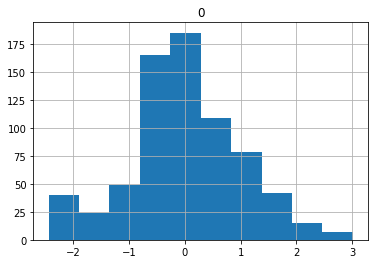

In [46]:
pd.DataFrame(train_data_trans).hist()
plt.show()

#### Transformación Yeo-Johnson

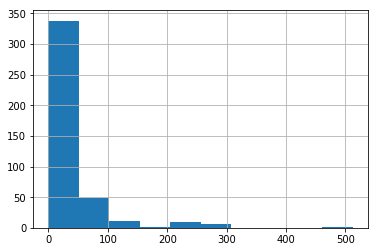

In [48]:
train.Fare.hist()
plt.show()

In [50]:
train_data = train[['Fare']]

pt = PowerTransformer(method='yeo-johnson')
pt.fit(train_data)
train_data_trans = pt.transform(train_data)
print("train:\n", train_data.head(10))
print("\nTransformación train:\n", pd.DataFrame(train_data_trans).head(10))

print("\nLambdas:",pt.lambdas_) # Automatically selected 
print("\nMedia:", np.mean(train_data_trans)) 
print("\nDesviación estándar:", np.std(train_data_trans))

train:
       Fare
0   7.8292
1   7.0000
2   9.6875
3   8.6625
4  12.2875
5   9.2250
6   7.6292
7  29.0000
8   7.2292
9  24.1500

Transformación train:
           0
0 -0.902443
1 -1.041711
2 -0.643499
3 -0.778438
4 -0.364856
5 -0.702235
6 -0.934453
7  0.537759
8 -1.001425
9  0.359528

Lambdas: [-0.28244999]

Media: nan

Desviación estándar: nan


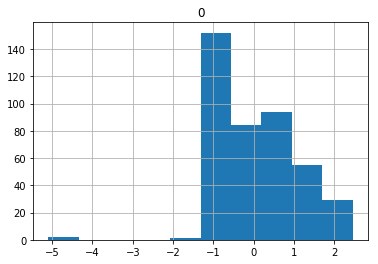

In [51]:
pd.DataFrame(train_data_trans).hist()
plt.show()

#### Recorte

In [61]:
df= train[['PassengerId', 'Pclass']]

p25 = df.quantile(0.25)
p75 = df.quantile(0.75)
print("p25:\n", p25)
print("p75:\n", p75)

p25:
 PassengerId    223.5
Pclass           2.0
Name: 0.25, dtype: float64
p75:
 PassengerId    668.5
Pclass           3.0
Name: 0.75, dtype: float64


In [59]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,417.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,35.627188
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,55.907576
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.500000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Elegimos variables sin nulos

In [62]:
data = {'PassengerId': train['PassengerId'], 'Pclass': train['Pclass']}
df = pd.DataFrame(data)

df[['PassengerId', 'Pclass']] = df[['PassengerId', 'Pclass']].clip(p25,p75,axis=1).astype('int')
df.head(10)

,PassengerId,Pclass
0,223,3
1,223,2
2,223,3
3,223,2
4,223,3
5,223,3
6,223,2
7,223,3
8,223,3
9,223,2


#### Biding 

In [64]:
df= pd.DataFrame(train['Age'], columns=['Age'])

df['Age_binned'] = pd.cut(df['Age'], bins=10, labels=False) 
df[['Age','Age_binned']].head(10)

,Age,Age_binned
0,22.0,2.0
1,38.0,4.0
2,26.0,3.0
3,35.0,4.0
4,35.0,4.0
5,NaN,NaN
6,54.0,6.0
7,2.0,0.0
8,27.0,3.0
9,14.0,1.0


#### Rango

In [66]:
df = pd.DataFrame(train['Pclass'], columns=['Pclass'])
df['Pclass_rank'] = df.Pclass.rank().astype('int')  #the rank of values starting from 1
df.head(10)

,Pclass,Pclass_rank
0,3,646
1,1,108
2,3,646
3,1,108
4,3,646
5,3,646
6,1,108
7,3,646
8,3,646
9,2,308


#### RankGauss 

In [68]:
from sklearn.preprocessing import QuantileTransformer

data = {'Fare': train['Fare'], 'Age': train['Age']}
df = pd.DataFrame(data)
    
transformer = QuantileTransformer(n_quantiles=10, random_state=1111, output_distribution='normal')
transformer.fit(df[['Fare']])
df['Fare_RankGauss'] = transformer.transform(df[['Fare']])
df[['Fare','Fare_RankGauss']].head(10)

,Fare,Fare_RankGauss
0,7.8292,-0.844316
1,7.0000,-1.278281
2,9.6875,-0.359555
3,8.6625,-0.430727
4,12.2875,-0.186076
5,9.2250,-0.391422
6,7.6292,-1.228576
7,29.0000,0.502402
8,7.2292,-1.259814
9,24.1500,0.374284


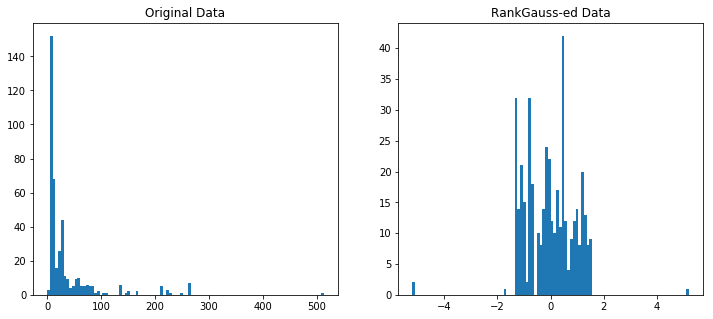

In [70]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[12,5])
ax1.hist(df['Fare'],bins=100)
ax1.title.set_text('Original Data')
ax2.hist(df['Fare_RankGauss'],bins=100)
ax2.title.set_text('RankGauss-ed Data')
plt.show()